# Figure 3

In [1]:
import sys

import constants
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from PyComplexHeatmap import *
from scipy.stats import pearsonr

sys.path.insert(1, "../helper_functions")
from helper_functions import prepare_bulk

In [2]:
newcmp = constants.NEWCMP
col = constants.COL

## Bulk

In [3]:
bulk195 = prepare_bulk("../data/p195_1MB_per_bin_calls_long.bed")
bulk63 = prepare_bulk("../data/p63_1MB_per_bin_calls_long.bed")

In [4]:
cut_chroms = bulk63[["chrom_num"]].copy()
cut_chroms.chrom_num = cut_chroms.chrom_num.astype(str)
cut_chroms.columns = ["chromosome"]
cut_chroms = cut_chroms.replace({"23": "X"})
cut_chroms

,chromosome
window,
chr1:1-1000001,1
chr1:1000001-2000001,1
chr1:2000001-3000001,1
chr1:3000001-4000001,1
chr1:4000001-5000001,1
...,...
chrX:152000001-153000001,X
chrX:153000001-154000001,X
chrX:154000001-155000001,X


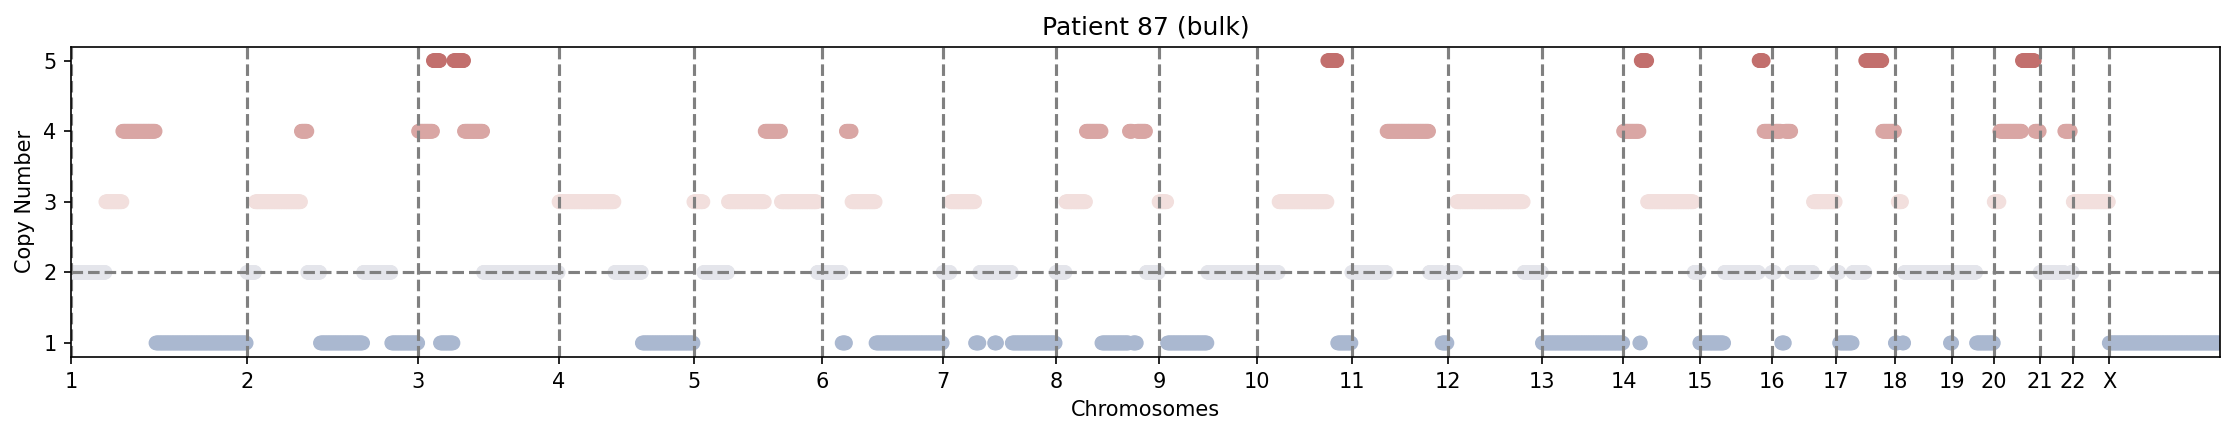

In [5]:
f, axs = plt.subplots(figsize=(15, 3), dpi=150)
# DNA
##################################################
ax = axs
tmp = bulk195.copy()
tmp["chromosome"] = np.arange(tmp.shape[0])
cut_chroms = [x[3:] for x in tmp.chrom]
tmp = tmp.reset_index()


ax.scatter(x=tmp.chromosome.values, y=tmp.CN.values, c=tmp.CN.values, cmap=newcmp)

ax.set_xticks(range(0, len(cut_chroms)), cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
for pos in ax.get_xticklabels():
    pos = pos.get_position()[0]
    ax.axvline(pos, ls="--", color="grey")

ax.axhline(2, ls="--", color="grey")
ax.set_xlabel("Chromosomes")
ax.set_ylabel("Copy Number")
ax.set_title("Patient 87 (bulk)")

plt.xlim(0, len(cut_chroms))


plt.tight_layout()
plt.savefig("figure3/patient87_bulk.png", dpi=300)
plt.savefig("figure3/patient87_bulk.svg", dpi=300)

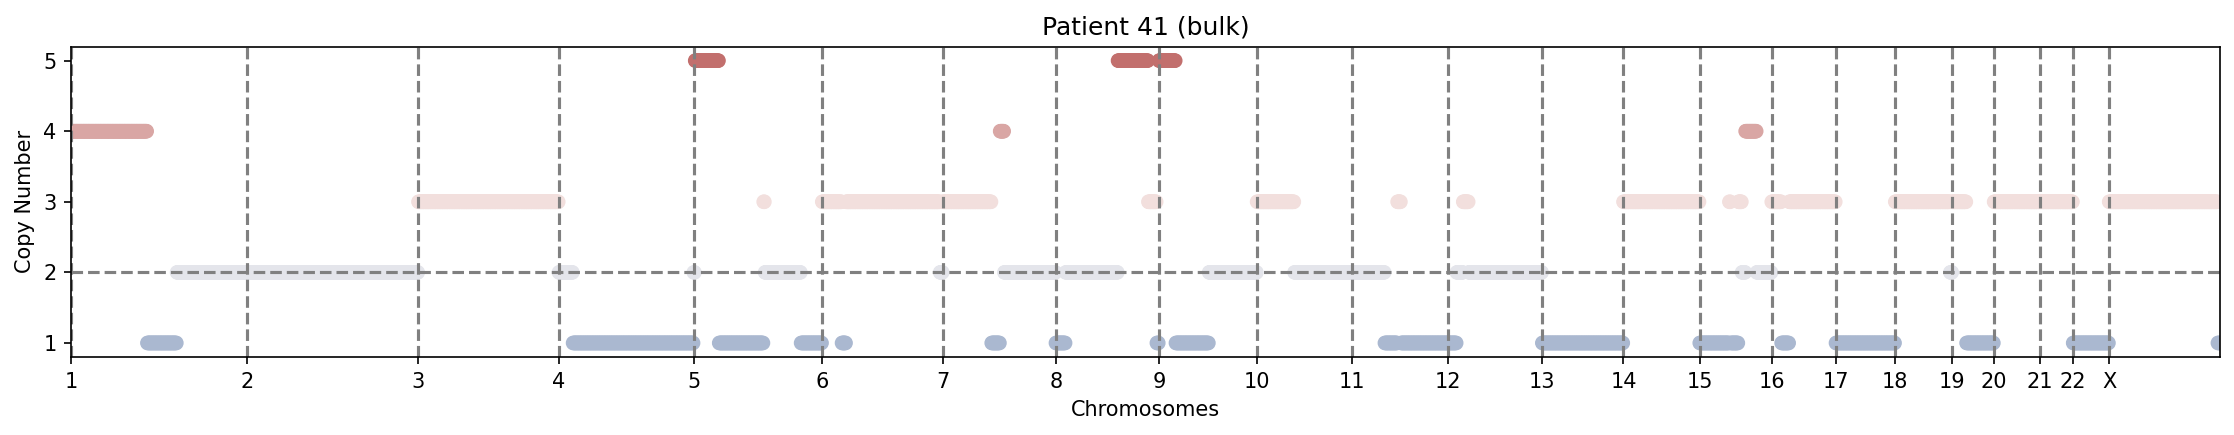

In [6]:
f, axs = plt.subplots(figsize=(15, 3), dpi=150)
# DNA
##################################################
ax = axs
tmp = bulk63.copy()
tmp["chromosome"] = np.arange(tmp.shape[0])
cut_chroms = [x[3:] for x in tmp.chrom]
tmp = tmp.reset_index()


ax.scatter(x=tmp.chromosome.values, y=tmp.CN.values, c=tmp.CN.values, cmap=newcmp)

ax.set_xticks(range(0, len(cut_chroms)), cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
for pos in ax.get_xticklabels():
    pos = pos.get_position()[0]
    ax.axvline(pos, ls="--", color="grey")

ax.axhline(2, ls="--", color="grey")
ax.set_xlabel("Chromosomes")
ax.set_ylabel("Copy Number")
ax.set_title("Patient 41 (bulk)")

plt.xlim(0, len(cut_chroms))

plt.tight_layout()
plt.savefig("figure3/patient41_bulk.png", dpi=300)
plt.savefig("figure3/patient41_bulk.svg", dpi=300)

In [7]:
bulk = pd.DataFrame([bulk195.CN, bulk63.CN])
bulk.index = ["bulk_195", "bulk_63"]

## sciHIPSD

In [8]:
sci = pd.read_csv("../data/CNVs_sciHIPSD_filtered.csv.gz", index_col=0)
sci

,chr1:1-1000001,chr1:1000001-2000001,chr1:2000001-3000001,chr1:3000001-4000001,chr1:4000001-5000001,chr1:5000001-6000001,chr1:6000001-7000001,chr1:7000001-8000001,chr1:8000001-9000001,chr1:9000001-10000001,...,chrY:48000001-49000001,chrY:49000001-50000001,chrY:50000001-51000001,chrY:51000001-52000001,chrY:52000001-53000001,chrY:53000001-54000001,chrY:54000001-55000001,chrY:55000001-56000001,chrY:56000001-57000001,chrY:57000001-58000001
LFS_03_AGCGATTGTTACTACG-1,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
LFS_03_CCTTGCACAGCAACCC-1,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
LFS_03_ATCCAGACACCAAGGA-1,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
LFS_03_CCTGGGACACAGATGG-1,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
LFS_03_TGCTTTATCAACACGT-1,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LFS_21_GCAGATTTCAGTGGTT-1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
LFS_21_GCGAGTCTCTACATCT-1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
LFS_21_CGCACAGCACCATTCC-1,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
LFS_21_CTAGGATGTCATAGCT-1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [9]:
sci = sci.reindex(columns=bulk63.index)
sci = sci.astype(int)

In [10]:
df1 = pd.DataFrame(
    [
        sci.apply(lambda row: pearsonr(row, bulk195.CN)[0], axis=1),
        sci.apply(lambda row: pearsonr(row, bulk63.CN)[0], axis=1),
    ]
)

In [11]:
df1 = df1.T
df1.columns = ["bulk_p195", "bulk_p63"]

In [12]:
leiden = pd.read_csv("../data/sci_leiden_clusters.csv", index_col=0)

In [13]:
df1["clusters"] = df1.index.map(leiden.cnv_leiden)

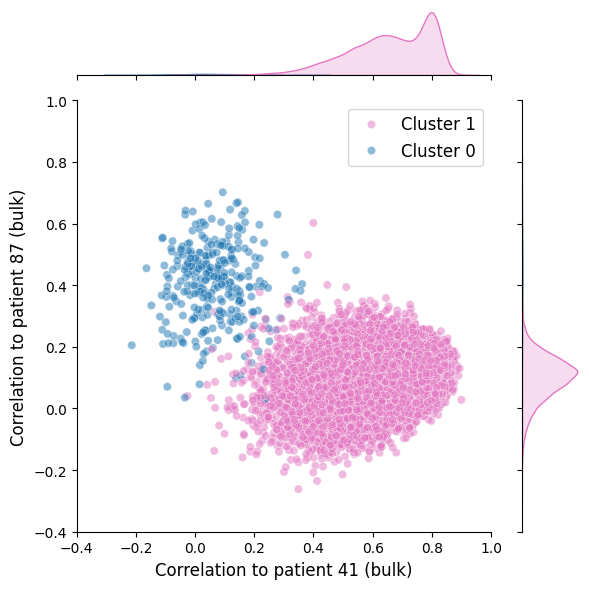

In [14]:
sns.jointplot(
    x="bulk_p63",
    y="bulk_p195",
    data=df1,
    hue="clusters",
    alpha=0.5,
    palette={
        "Cluster 1": sns.palettes.color_palette("tab10")[6],
        "Cluster 0": sns.palettes.color_palette("tab10")[0],
    },
)


plt.xlabel("Correlation to patient 41 (bulk)", fontsize=12)
plt.ylabel("Correlation to patient 87 (bulk)", fontsize=12)
plt.legend(fontsize=12)
plt.xlim(-0.4, 1)
plt.ylim(-0.4, 1)
plt.tight_layout()

plt.savefig("figure3/correlation.png", dpi=300)
plt.savefig("figure3/correlation.svg", dpi=300)

In [15]:
df1.value_counts("clusters") / df1.value_counts("clusters").sum()

clusters
Cluster 1    0.982793
Cluster 0    0.017207
Name: count, dtype: float64

### single-cell heatmap

In [16]:
cut_chroms = bulk63[["chrom_num"]].copy()
cut_chroms.chrom_num = cut_chroms.chrom_num.astype(str)
cut_chroms.columns = ["chromosome"]
cut_chroms = cut_chroms.replace({"23": "X"})
cut_chroms

,chromosome
window,
chr1:1-1000001,1
chr1:1000001-2000001,1
chr1:2000001-3000001,1
chr1:3000001-4000001,1
chr1:4000001-5000001,1
...,...
chrX:152000001-153000001,X
chrX:153000001-154000001,X
chrX:154000001-155000001,X


In [17]:
newcmp = sns.color_palette("vlag", 6)[1:]
newcmp[1] = (1, 1, 1)
newcmp = ListedColormap(newcmp, "my_cmap3")

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


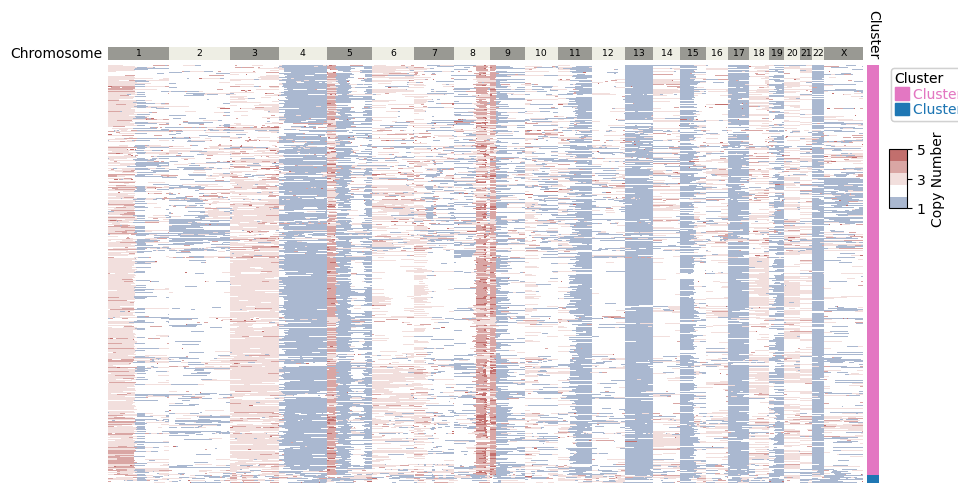

In [18]:
plt.figure(figsize=(10, 5))

col_ha = HeatmapAnnotation(
    Chromosome=anno_simple(
        cut_chroms.chromosome, add_text=True, colors=col, text_kws={"color": "black"}
    ),
    plot_legend=False,
    axis=1,
    rasterized=True,
    label_side="left",
    verbose=0,
)
row_ha = HeatmapAnnotation(
    Cluster=anno_simple(
        df1.clusters,
        add_text=False,
        colors={
            "Cluster 1": sns.palettes.color_palette("tab10")[6],
            "Cluster 0": sns.palettes.color_palette("tab10")[0],
        },
    ),
    plot_legend=True,
    axis=0,
    rasterized=True,
)
cm1 = ClusterMapPlotter(
    data=sci[cut_chroms.index],
    row_dendrogram=False,  # set to False for the main figure
    show_rownames=False,
    show_colnames=False,
    top_annotation=col_ha,
    right_annotation=row_ha,
    row_cluster_metric="cityblock",
    row_cluster_method="ward",
    col_cluster=False,
    row_cluster=True,
    label="Copy Number",
    cmap=newcmp,
    rasterized=True,
    row_split=df1.clusters,
    row_split_gap=0,
    row_split_order=["Cluster 1", "Cluster 0"],
)

plt.savefig("figure3/dna_mix_sci_final.png", dpi=300)
plt.savefig("figure3/dna_mix_sci_final.svg", dpi=300)